In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
import datetime as dt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data= data[pd.notnull(data['CustomerID'])]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
len(data)

406829

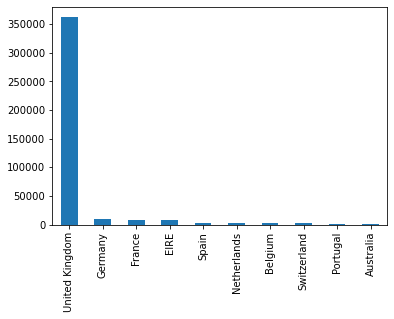

In [6]:
data.Country.value_counts()[:10].plot(kind='bar')

In [7]:
data = data[(data['Quantity']>0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [8]:
data=data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [9]:
data['InvoiceDate'].min(),data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [10]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
PRESENT = dt.datetime(2020,9,1)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [11]:
rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [12]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [13]:
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,3513,1,77183.60
12347.0,3190,182,4310.00
12348.0,3263,31,1797.24
12349.0,3206,73,1757.55
12350.0,3498,17,334.40


In [14]:
from sklearn.preprocessing import normalize

In [16]:
rfm_scaled = normalize(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.columns)
rfm_scaled.head()

,recency,frequency,monetary
0,0.045468,0.000013,0.998966
1,0.594573,0.033922,0.803326
2,0.875892,0.008321,0.482436
3,0.876704,0.019962,0.480615
4,0.995450,0.004838,0.095163


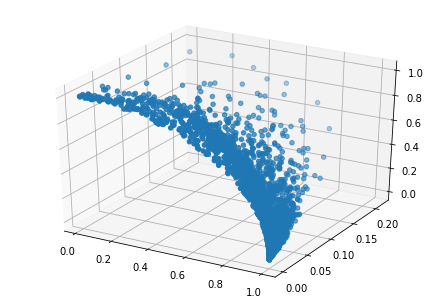

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_scaled['recency'], rfm_scaled['frequency'], rfm_scaled['monetary'])
plt.show()

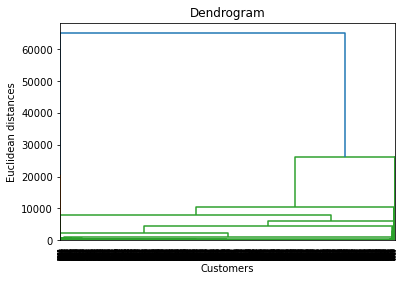

In [18]:
linked = linkage(rfm, 'single')
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [19]:
cluster = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
cluster.fit_predict(rfm_scaled)
clusterCount = {}
for i in set(cluster.labels_):
    clusterCount[i] = 0
for i in cluster.labels_:
    clusterCount[i] += 1
clusterCount

{0: 190,
 1: 202,
 2: 378,
 3: 521,
 4: 91,
 5: 581,
 6: 298,
 7: 139,
 8: 732,
 9: 335,
 10: 38,
 11: 153,
 12: 681}

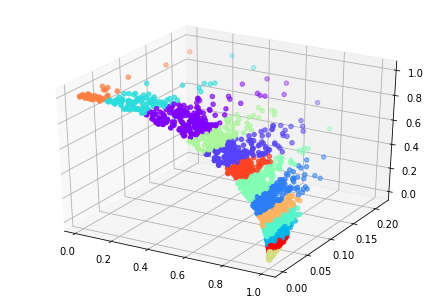

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(rfm_scaled['recency'], rfm_scaled['frequency'], rfm_scaled['monetary'],c=cluster.labels_, cmap='rainbow')
plt.show()